In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. Subir el dataset en un dataframe de Spark

In [3]:
from pyspark import SparkContext
from pyspark.sql.functions import *

In [4]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.master("local").appName("Proyecto").config('sapark.ui.pork', '4050').getOrCreate()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Análisis exploratorio de datos


In [6]:
df= spark.read.csv('/content/drive/My Drive/datab/Tarjeta_de_credito/Credito.csv', inferSchema=True, header=True)

In [7]:
df_TC=df.toPandas()
df_TC.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
#DIMENSION DE DATAFRAME
df_TC.shape

(8950, 18)

In [9]:
#MOSTRAR VALORES NULOS
df_TC.isnull().sum()/len(df_TC)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [10]:
#ELIMINAR VALORES NULOS
df_TC.dropna(inplace=True)

In [11]:
#Correcciòn de valores#Correcciòn de valores nulos
df_TC.isnull().sum()/len(df_TC)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [12]:
#DIMENSION DE DATAFRAME DESPUES DE LA LIMPIEZA
df_TC.shape

(8636, 18)

In [13]:
df_TC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int32  
 12  PURCHA

In [14]:
df_TC.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int32
PURCHASES_TRX                         int32
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int32
dtype: object

In [15]:
df_TC.fillna(0)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
df.show()

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS|MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+----------------+----------------+------+
| C10001|  40.900749|         0.818182|     95.4|             0.0|                  95.4|  

In [17]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
r=15
ba= df_TC[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']].sort_values(by='CREDIT_LIMIT', ascending=False)[:r]

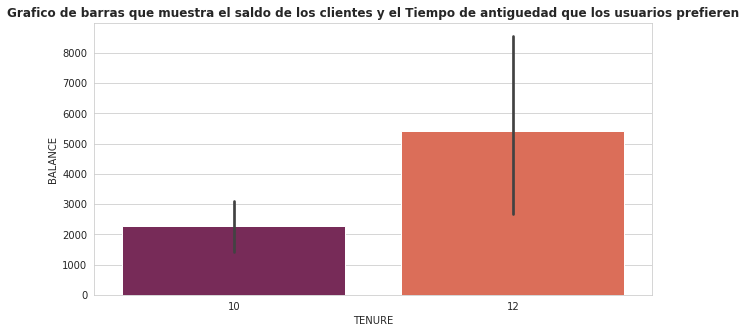

In [19]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=ba.BALANCE,x=ba.TENURE, palette="rocket")
plt.title('Grafico de barras que muestra el saldo de los clientes y el Tiempo de antiguedad que los usuarios prefieren', fontsize=12, fontweight="bold")
plt.show()

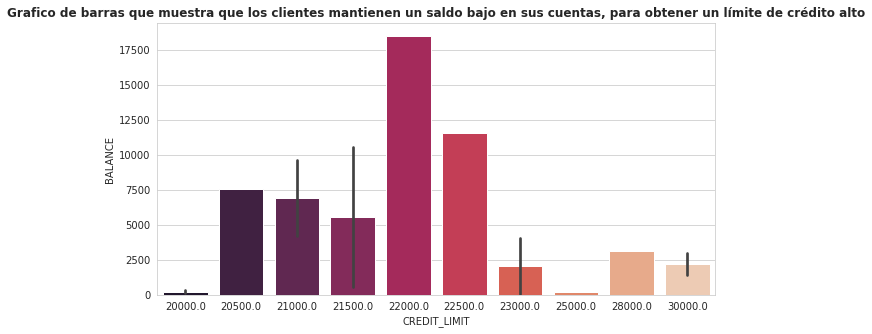

In [20]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=ba.BALANCE,x=ba.CREDIT_LIMIT, palette="rocket")
plt.title('Grafico de barras que muestra que los clientes mantienen un saldo bajo en sus cuentas, para obtener un límite de crédito alto', fontsize=12, fontweight="bold")
plt.show()

<ipython-input-22-806ae5fc0379>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda1['TENURE'] = eda1['TENURE'].astype(str)


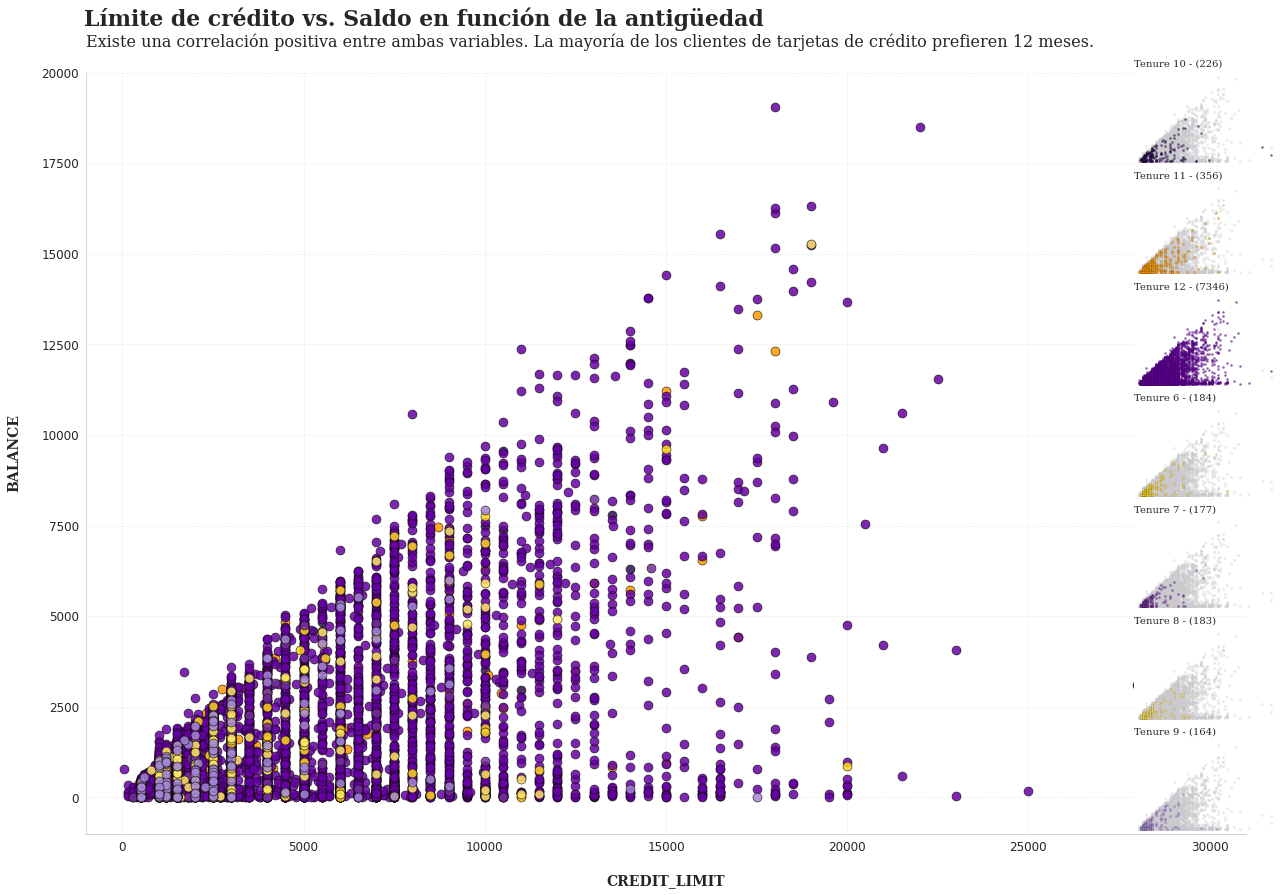

In [22]:
# --- EDA 1 Variables ---
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

# --- EDA 1 Data Frame ---
eda1 = df_TC[['CREDIT_LIMIT', 'BALANCE', 'TENURE']]
eda1['TENURE'] = eda1['TENURE'].astype(str)
tenure = sorted(eda1['TENURE'].unique())

# --- EDA 1 Settings ---
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

# --- EDA 1: Main Scatter Plot ---
for x in range(len(tenure)):
    eda1_x = eda1[eda1['TENURE']==tenure[x]]
    ax.scatter(eda1_x['CREDIT_LIMIT'], eda1_x['BALANCE'], s=80, color=color_pallete[x], **scatter_style)
    ax.set_title('Existe una correlación positiva entre ambas variables. La mayoría de los clientes de tarjetas de crédito prefieren 12 meses.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('BALANCE\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# --- EDA 1: Sub Plots ---
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[idx, 6], aspect=1)
    
    sub_axes[idx].scatter(eda1[eda1['TENURE']!=tnr]['CREDIT_LIMIT'], eda1[eda1['TENURE']!=tnr]['BALANCE'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda1[eda1['TENURE']==tnr]['CREDIT_LIMIT'], eda1[eda1['TENURE']==tnr]['BALANCE'], color=color_pallete[idx], label=tnr, **sub_scatter_style_color)
    
    cnt = (eda1['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

# --- EDA 1 XY Limit ---
for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 20000)

# --- EDA 1 Title ---
plt.suptitle('Límite de crédito vs. Saldo en función de la antigüedad', x=0.145, y=0.945, ha='left', **suptitle)
plt.show()

El diagrama de dispersión muestra que cuando los valores de las variables aumentan, la distribución/varianza residual también aumenta hasta formar un cono (heteroscedasticidad). Además, como ya se ha mencionado, la mayoría de los clientes de tarjetas de crédito prefieren una permanencia de 12 meses.

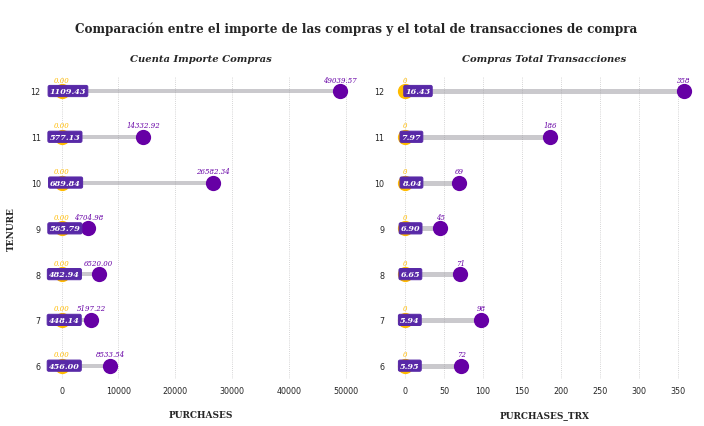

In [23]:
# --- EDA 2 Variables ---
title=dict(fontsize=10, fontfamily='serif', style='italic', weight='bold', ha='center')
grid_style = dict(alpha=0.6, color='#9B9A9C', linestyle='dotted', zorder=1)
sct_style = dict(s=175, linewidth=2)
xy_label = dict(fontweight='bold', fontsize=9, fontfamily='serif')
ann_style = dict(xytext=(0, 0), textcoords='offset points', va='center', ha='center', style='italic', fontfamily='serif')
tenure = sorted(df_TC['TENURE'].unique())
color_pallete = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

# --- EDA 2.1 Data Frame ---
eda2_1 = df_TC[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

# --- EDA 2.2 Data Frame ---
eda2_2 = df_TC[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# --- EDA 2.1 & 2.2 Settings ---
fig = plt.figure(figsize=(10, 6))
plt.suptitle('\nComparación entre el importe de las compras y el total de transacciones de compra', fontweight='heavy', fontsize=12, fontfamily='serif')

# --- EDA 2.1 (Left Dumbbell) ---
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left=plt.gca()
min_sct = plt.scatter(x=eda2_1['MIN'], y=eda2_1['TENURE'], c='#FFBB00', **sct_style)
max_sct = plt.scatter(x=eda2_1['MAX'], y=eda2_1['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_1_x = eda2_1[eda2_1['TENURE']==tenure[i]]
    plt.hlines(y=eda2_1_x['TENURE'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4, color='#CAC9CD', zorder=0)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MIN'].values[0]), xy=(eda2_1_x['MIN'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['AVG'].values[0]), xy=(eda2_1_x['AVG'].values[0], eda2_1_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MAX'].values[0]), xy=(eda2_1_x['MAX'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nCuenta Importe Compras\n', **title)

# --- EDA 2.2 (Right Dumbbell) ---
plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right=plt.gca()
min_sctt = plt.scatter(x=eda2_2['MIN'], y=eda2_2['TENURE'], c='#FFBB00', **sct_style)
max_sctt = plt.scatter(x=eda2_2['MAX'], y=eda2_2['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_2_x = eda2_2[eda2_2['TENURE']==tenure[i]]
    plt.hlines(y=eda2_2_x['TENURE'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5, color='#CAC9CD', zorder=0)
    plt.annotate('{:.0f}'.format(eda2_2_x['MIN'].values[0]), xy=(eda2_2_x['MIN'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_2_x['AVG'].values[0]), xy=(eda2_2_x['AVG'].values[0], eda2_2_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{:.0f}'.format(eda2_2_x['MAX'].values[0]), xy=(eda2_2_x['MAX'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nCompras Total Transacciones\n', **title)

plt.show();

Del gráfico se puede concluir que los clientes de tarjetas de crédito con 12 meses de permanencia están dispuestos a asumir el importe de compra y tienen más transacciones totales de compra que los clientes con otros periodos de permanencia.
El gráfico también muestra que los clientes con diez meses de antigüedad tienen un importe de compra más elevado que los clientes con 11 meses de antigüedad. Sin embargo, esto es inversamente proporcional a las transacciones totales, donde los clientes con diez meses de antigüedad tienen menos transacciones que los clientes con 11 meses de antigüedad. 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
header = '\nUniversidad de Guayaquil - Facultad de Ingeniería Industrial\nIngeniería en Sistemas de Información - Analisis de Datos masivos\nNCH'

def cor_plot(df, size = (24,12)):
  plt.figure(figsize=size,facecolor=('xkcd:bluegray'))
  hm = sns.heatmap(df_TC.corr().round(2), vmin=-1, vmax=1, annot=True)
  hm.set_title('Mapa de Calor - Correlaciones - Comportamiento de clientes en una entidad bancaria'+header, fontdict={'fontsize':12}, pad=12)

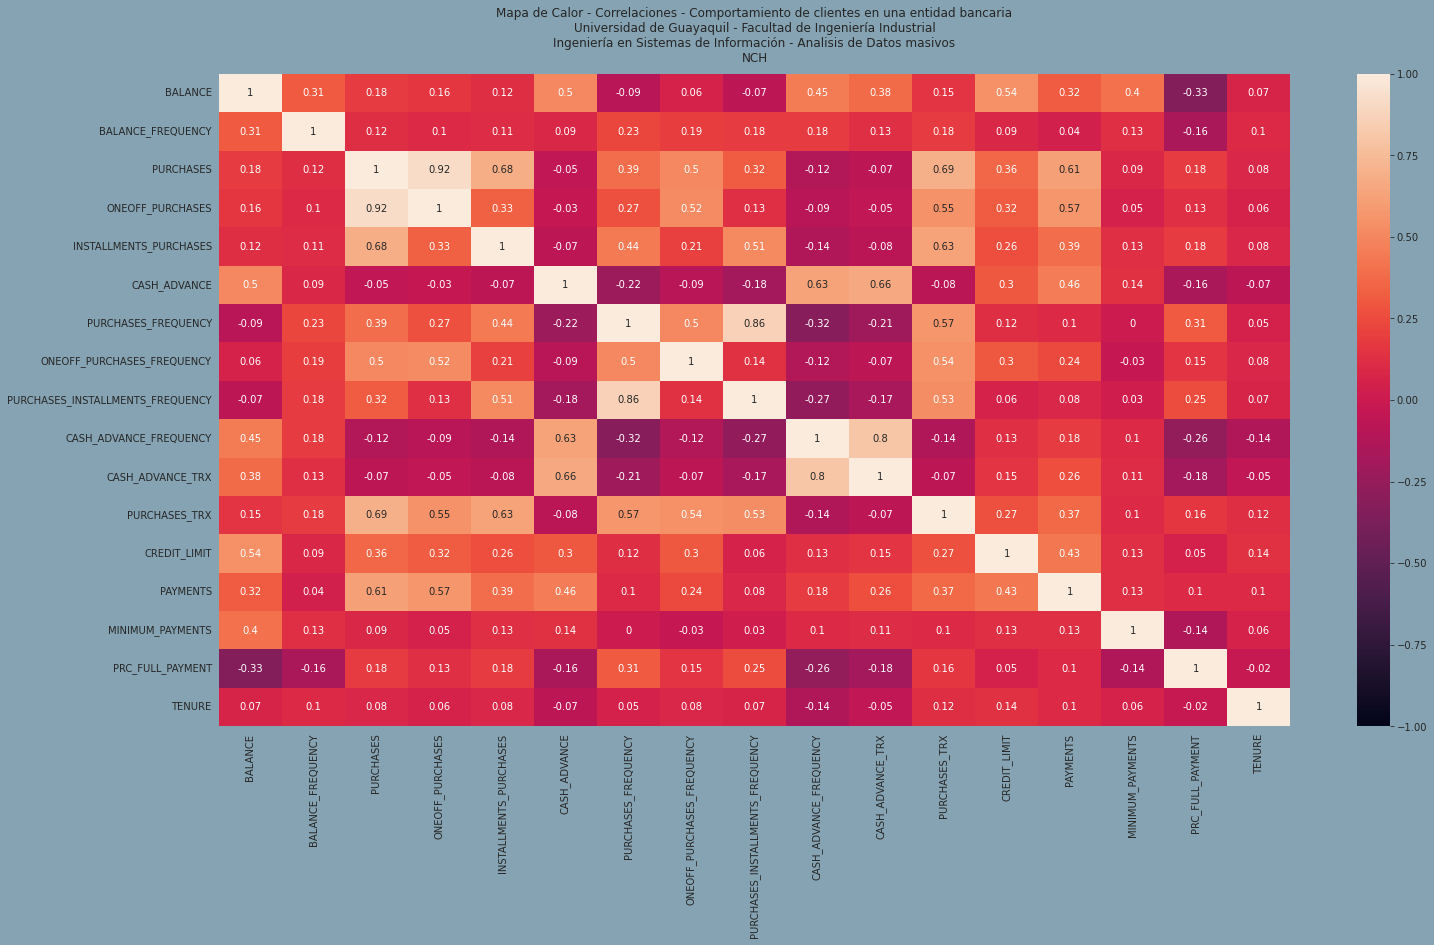

In [24]:
cor_plot(df_TC)

Ejemplos de variables de alta correlación son COMPRAS y COMPRAS ÚNICAS, con un valor de correlación de 0,92. Otro ejemplo es CASH_ADVANCE_TRX con CASH_ADVANCE_FREQUENCY con un valor de correlación de 0,8.
Al usar una tarjeta de crédito, la mayoría de los clientes de tarjetas de crédito prefieren una tenencia de 12 meses en comparación con otras opciones de tenencia. Esto puede concluir que los clientes tienen más probabilidades de pagar los créditos a largo plazo con la consecuencia de una tasa de interés más alta.
Al investigar más a fondo la columna SALDO, parece que hay muchas tarjetas de crédito con 0 saldos. También es compatible con tantos montos de compra 0 en la columna COMPRA. Con base en esos resultados, se puede suponer que algunos usuarios mantienen intencionalmente un saldo bajo en su cuenta para obtener un límite de crédito alto, lo que afecta el aumento del índice de utilización del crédito y el puntaje de crédito.

La mayoría de las cuentas de tarjetas de crédito tienen 1 puntaje en la columna BALANCE_FREQUENCY, lo que indica que la mayoría de los clientes usan la tarjeta de crédito con frecuencia. Sin embargo, esto es diferente de ONEOFF_PURCHASES y PURCHASES_INSTALLMENT_FREQUENCY, donde la mayoría de los clientes no utilizan tarjetas de crédito para transacciones únicas o pagos a plazos.

#FEATURES

In [25]:
newdata = df[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','TENURE']]
newdata

DataFrame[BALANCE: double, BALANCE_FREQUENCY: double, PURCHASES: double, ONEOFF_PURCHASES: double, CASH_ADVANCE_FREQUENCY: double, CASH_ADVANCE_TRX: int, TENURE: int]

In [91]:
features = newdata.columns[1:]
print(features)

['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE']


#Vector Assembler

In [27]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = features, outputCol='ret_features')
assembled_data = assembler.transform(newdata)
assembled_data = assembled_data.select('PURCHASES','ret_features')
assembled_data.show()

+---------+--------------------+
|PURCHASES|        ret_features|
+---------+--------------------+
|     95.4|[0.818182,95.4,0....|
|      0.0|[0.909091,0.0,0.0...|
|   773.17|[1.0,773.17,773.1...|
|   1499.0|[0.636364,1499.0,...|
|     16.0|[1.0,16.0,16.0,0....|
|  1333.28|[1.0,1333.28,0.0,...|
|  7091.01|[1.0,7091.01,6402...|
|    436.2|[1.0,436.2,0.0,0....|
|   861.49|[1.0,861.49,661.4...|
|   1281.6|[0.545455,1281.6,...|
|   920.12|[1.0,920.12,0.0,0...|
|  1492.18|[0.818182,1492.18...|
|  3217.99|[1.0,3217.99,2500...|
|  2137.93|[1.0,2137.93,419....|
|      0.0|[1.0,0.0,0.0,0.08...|
|   1611.7|[1.0,1611.7,0.0,0...|
|      0.0|[0.875,0.0,0.0,0....|
|    519.0|[0.454545,519.0,0...|
|   504.35|[1.0,504.35,166.0...|
|   398.64|[1.0,398.64,0.0,0...|
+---------+--------------------+
only showing top 20 rows



#Standarizacion escalas

In [50]:
#Standarizacion escalas

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='ret_features',outputCol='ret_standard')
data_scale = scaler.fit(assembled_data)
standard_data = data_scale.transform(assembled_data)
standard_data.show()

+---------+--------------------+--------------------+
|PURCHASES|        ret_features|        ret_standard|
+---------+--------------------+--------------------+
|     95.4|[0.818182,95.4,0....|[3.45364363087058...|
|      0.0|[0.909091,0.0,0.0...|[3.83738134306520...|
|   773.17|[1.0,773.17,773.1...|[4.22111905525981...|
|   1499.0|[0.636364,1499.0,...|[2.68616820648135...|
|     16.0|[1.0,16.0,16.0,0....|[4.22111905525981...|
|  1333.28|[1.0,1333.28,0.0,...|[4.22111905525981...|
|  7091.01|[1.0,7091.01,6402...|[4.22111905525981...|
|    436.2|[1.0,436.2,0.0,0....|[4.22111905525981...|
|   861.49|[1.0,861.49,661.4...|[4.22111905525981...|
|   1281.6|[0.545455,1281.6,...|[2.30243049428674...|
|   920.12|[1.0,920.12,0.0,0...|[4.22111905525981...|
|  1492.18|[0.818182,1492.18...|[3.45364363087058...|
|  3217.99|[1.0,3217.99,2500...|[4.22111905525981...|
|  2137.93|[1.0,2137.93,419....|[4.22111905525981...|
|      0.0|[1.0,0.0,0.0,0.08...|[4.22111905525981...|
|   1611.7|[1.0,1611.7,0.0,0

**DETERMINACIÓN DEL NÚMERO DE CLUSTER**

In [29]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

costs = {}

for k in range(2,10):
  k_means = KMeans(featuresCol='ret_standard',k=k)
  model = k_means.fit(standard_data)
  costs[k] = model.summary.trainingCost
  print(k)

2
3
4
5
6
7
8
9


**ANALISIS DEL CODO**

Text(0, 0.5, 'Costo')

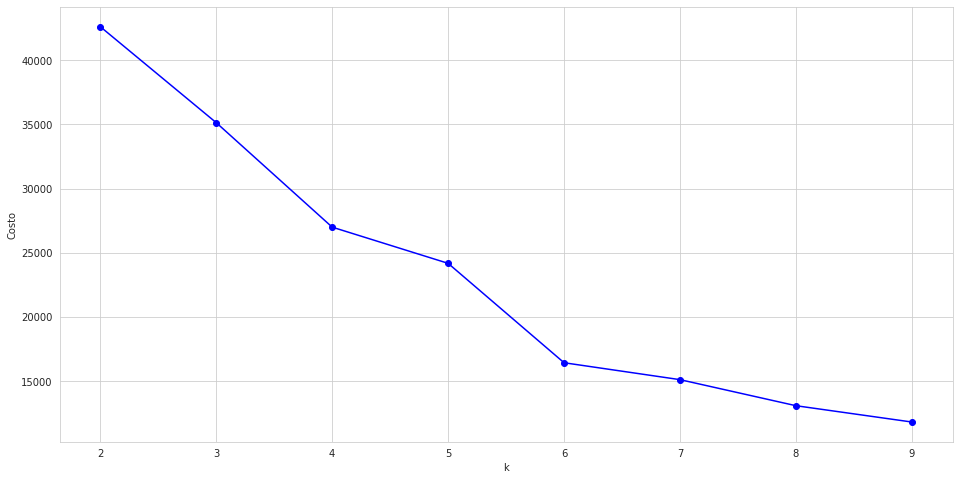

In [30]:
fig,ax = plt.subplots(1,1, figsize=(16,8))

ax.plot(list(costs.keys()),list(costs.values()),'-ob')
ax.set_xlabel('k')
ax.set_ylabel('Costo')

#MODELO K-MEANS

In [31]:
k_means = KMeans(featuresCol='ret_standard',k=4)
model = k_means.fit(standard_data)
predictions = model.transform(standard_data)

In [32]:
result = predictions.select('PURCHASES', 'prediction')
result.show()

+---------+----------+
|PURCHASES|prediction|
+---------+----------+
|     95.4|         0|
|      0.0|         0|
|   773.17|         0|
|   1499.0|         2|
|     16.0|         0|
|  1333.28|         0|
|  7091.01|         3|
|    436.2|         0|
|   861.49|         0|
|   1281.6|         2|
|   920.12|         0|
|  1492.18|         0|
|  3217.99|         0|
|  2137.93|         0|
|      0.0|         0|
|   1611.7|         0|
|      0.0|         0|
|    519.0|         2|
|   504.35|         0|
|   398.64|         0|
+---------+----------+
only showing top 20 rows



In [33]:
dfp = result.join(newdata, on='PURCHASES', how='inner')
print(dfp)

DataFrame[PURCHASES: double, prediction: int, BALANCE: double, BALANCE_FREQUENCY: double, ONEOFF_PURCHASES: double, CASH_ADVANCE_FREQUENCY: double, CASH_ADVANCE_TRX: int, TENURE: int]


In [34]:
dfc = dfp.toPandas()

In [35]:
dfc

,PURCHASES,prediction,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,TENURE
0,95.40,0,40.900749,0.818182,0.00,0.000000,0,12
1,0.00,2,3202.467416,0.909091,0.00,0.250000,4,12
2,0.00,2,3202.467416,0.909091,0.00,0.250000,4,12
3,0.00,2,3202.467416,0.909091,0.00,0.250000,4,12
4,0.00,2,3202.467416,0.909091,0.00,0.250000,4,12
...,...,...,...,...,...,...,...,...
4189237,0.00,1,13.457564,0.833333,0.00,0.166667,2,6
4189238,0.00,0,13.457564,0.833333,0.00,0.166667,2,6
4189239,0.00,0,13.457564,0.833333,0.00,0.166667,2,6
4189240,0.00,0,13.457564,0.833333,0.00,0.166667,2,6


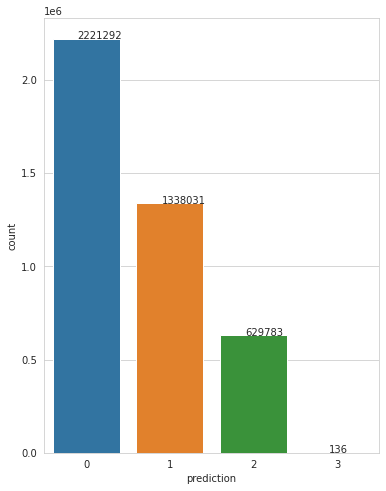

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))

sns.countplot(x="prediction", data=dfc)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 20))

#Implementar Modelo GMM

In [37]:
from pyspark.ml.clustering import GaussianMixture

In [38]:
gmm = GaussianMixture(featuresCol='ret_standard').setK(4).setSeed(538009335)
model_gmm = gmm.fit(standard_data)

print("Gaussians shown as a DataFrame: ")
model_gmm.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+---------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                                                                                 |cov                                                                                                                                                                                                                                                                                                              

In [44]:
predictions_gmm = model.transform(standard_data)
predictions_gmm.show()

+---------+--------------------+--------------------+----------+
|PURCHASES|        ret_features|        ret_standard|prediction|
+---------+--------------------+--------------------+----------+
|     95.4|[0.818182,95.4,0....|[3.45364363087058...|         0|
|      0.0|[0.909091,0.0,0.0...|[3.83738134306520...|         0|
|   773.17|[1.0,773.17,773.1...|[4.22111905525981...|         0|
|   1499.0|[0.636364,1499.0,...|[2.68616820648135...|         2|
|     16.0|[1.0,16.0,16.0,0....|[4.22111905525981...|         0|
|  1333.28|[1.0,1333.28,0.0,...|[4.22111905525981...|         0|
|  7091.01|[1.0,7091.01,6402...|[4.22111905525981...|         3|
|    436.2|[1.0,436.2,0.0,0....|[4.22111905525981...|         0|
|   861.49|[1.0,861.49,661.4...|[4.22111905525981...|         0|
|   1281.6|[0.545455,1281.6,...|[2.30243049428674...|         2|
|   920.12|[1.0,920.12,0.0,0...|[4.22111905525981...|         0|
|  1492.18|[0.818182,1492.18...|[3.45364363087058...|         0|
|  3217.99|[1.0,3217.99,2

In [40]:
dfpg = predictions_gmm.join(df, on='PURCHASES', how='inner')
print(dfpg)

DataFrame[PURCHASES: double, ret_features: vector, ret_standard: vector, prediction: int, CUST_ID: string, BALANCE: double, BALANCE_FREQUENCY: double, ONEOFF_PURCHASES: double, INSTALLMENTS_PURCHASES: double, CASH_ADVANCE: double, PURCHASES_FREQUENCY: double, ONEOFF_PURCHASES_FREQUENCY: double, PURCHASES_INSTALLMENTS_FREQUENCY: double, CASH_ADVANCE_FREQUENCY: double, CASH_ADVANCE_TRX: int, PURCHASES_TRX: int, CREDIT_LIMIT: double, PAYMENTS: double, MINIMUM_PAYMENTS: double, PRC_FULL_PAYMENT: double, TENURE: int]


**REGRESION LOGISTICA**

In [123]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features",labelCol="target",maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [121]:
training, testing = train_lr.randomSplit([0.8, 0.2])

In [ ]:
model = lr.fit(training)

In [ ]:
predictions = model.transform(testing)
predictions.select("prediction", "target", "features").show(5)

+----------+------+--------------------+
|prediction|target|            features|
+----------+------+--------------------+
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
|       1.0|   1.0|(16,[0,1,5,8,9,11...|
+----------+------+--------------------+
only showing top 5 rows



Comparacion
El algoritmo de kmeans es mas favorable que el algoritmo de Gauss ya que permite observar mejor los grupos que presenta este conjunto de datos, pero gracias a la regresion logistica podemos realizar prediciones futuras.